Visualizing for n_informative=5, n_classes=2, n_clusters_per_class=2, class_sep=0.65
Visualizing for n_informative=5, n_classes=2, n_clusters_per_class=2, class_sep=1.0
Visualizing for n_informative=5, n_classes=2, n_clusters_per_class=3, class_sep=0.65
Visualizing for n_informative=5, n_classes=2, n_clusters_per_class=3, class_sep=1.0
Visualizing for n_informative=5, n_classes=3, n_clusters_per_class=2, class_sep=0.65
Visualizing for n_informative=5, n_classes=3, n_clusters_per_class=2, class_sep=1.0
Visualizing for n_informative=5, n_classes=3, n_clusters_per_class=3, class_sep=0.65
Visualizing for n_informative=5, n_classes=3, n_clusters_per_class=3, class_sep=1.0
Visualizing for n_informative=5, n_classes=4, n_clusters_per_class=2, class_sep=0.65
Visualizing for n_informative=5, n_classes=4, n_clusters_per_class=2, class_sep=1.0
Visualizing for n_informative=5, n_classes=4, n_clusters_per_class=3, class_sep=0.65
Visualizing for n_informative=5, n_classes=4, n_clusters_per_class=3, 

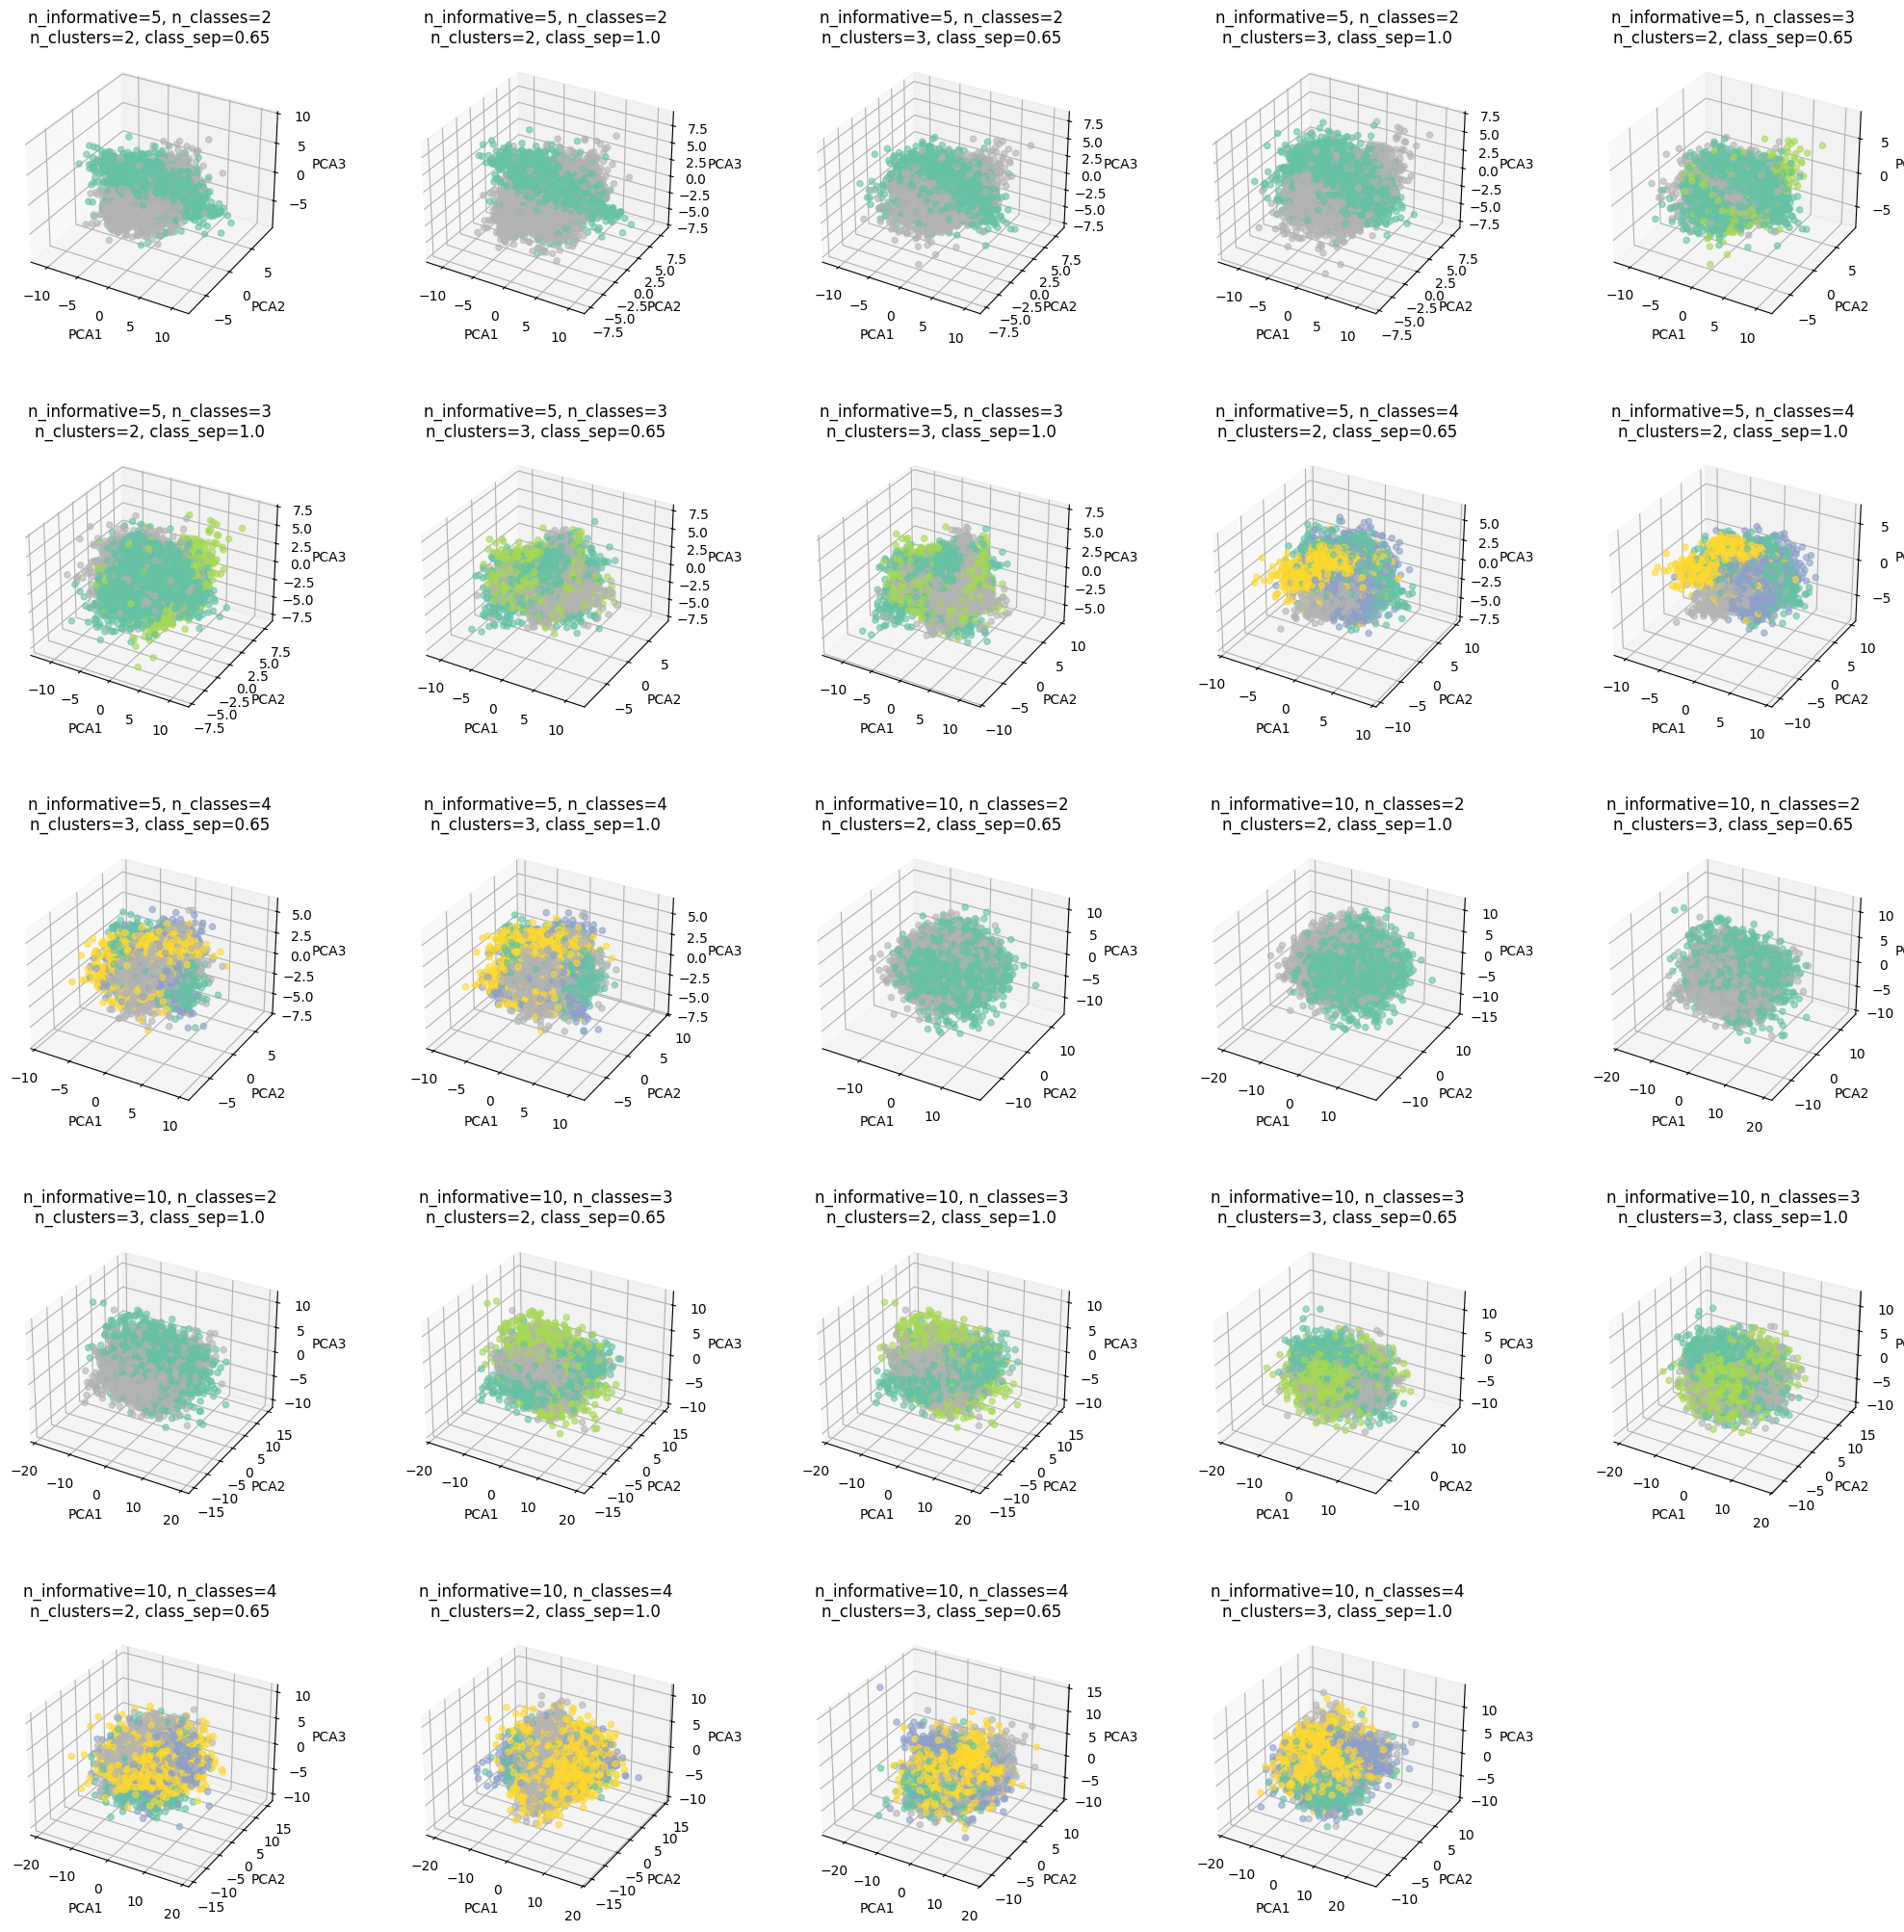

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Function to generate data based on the given parameters
def generate_data(n_informative, n_classes, n_clusters_per_class, class_sep):
    # Generate the classification dataset
    X, y = make_classification(
        n_samples=10000,          
        n_features=20,           
        n_informative=n_informative,                              
        n_classes=n_classes,             
        n_clusters_per_class=n_clusters_per_class, 
        flip_y=0.1,              
        class_sep=class_sep,           
        random_state=42         
    )

    # Create a DataFrame from the generated dataset
    df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
    df["Class"] = y

    return df, X, y

# Function to perform PCA and visualize the data in 3D
def visualize_data_3d(X, y, n_informative, n_classes, n_clusters_per_class, class_sep, ax):
    # Apply PCA for dimensionality reduction to 3D
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame for the 3D PCA results
    df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
    df_pca["Class"] = y

    # Scatter plot of the data
    scatter = ax.scatter(df_pca["PCA1"], df_pca["PCA2"], df_pca["PCA3"], c=df_pca["Class"], cmap="Set2", alpha=0.6)

    # Adding labels and title
    ax.set_title(f"n_informative={n_informative}, n_classes={n_classes}\n"
                 f"n_clusters={n_clusters_per_class}, class_sep={class_sep}")
    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")
    ax.set_zlabel("PCA3")

    # Add color bar
    return scatter

# Function to loop through various combinations of parameters and plot 3D visualizations in a grid
def loop_and_visualize_grid():
    # Define the range of values for the parameters
    n_informative_values = [5, 10]
    n_classes_values = [2, 3, 4]
    n_clusters_per_class_values = [2, 3]
    class_sep_values = [0.65, 1.0]

    # Calculate the grid size
    num_plots = len(n_informative_values) * len(n_classes_values) * len(n_clusters_per_class_values) * len(class_sep_values)
    grid_size = int(num_plots**0.5) + 1  # Find the smallest integer grid that can fit all plots

    # Create subplots in a grid layout
    fig = plt.figure(figsize=(grid_size * 5, grid_size * 5))
    grid = plt.GridSpec(grid_size, grid_size, wspace=0.4, hspace=0.4)

    # Initialize plot counter
    plot_counter = 0

    # Loop through all combinations of these parameters
    for n_informative in n_informative_values:
        for n_classes in n_classes_values:
            for n_clusters_per_class in n_clusters_per_class_values:
                for class_sep in class_sep_values:
                    print(f"Visualizing for n_informative={n_informative}, n_classes={n_classes}, "
                          f"n_clusters_per_class={n_clusters_per_class}, class_sep={class_sep}")

                    # Generate the dataset
                    df, X, y = generate_data(n_informative, n_classes, n_clusters_per_class, class_sep)

                    # Create a subplot for each combination in the grid
                    ax = fig.add_subplot(grid[plot_counter], projection='3d')

                    # Visualize the data in 3D
                    scatter = visualize_data_3d(X, y, n_informative, n_classes, n_clusters_per_class, class_sep, ax)

                    # Increment plot counter
                    plot_counter += 1

                    # Break the loop if all grid cells are filled
                    if plot_counter >= num_plots:
                        break

    # Show the final grid of 3D plots
    plt.show()


loop_and_visualize_grid()